<a href="https://colab.research.google.com/github/dilp90/PDI/blob/main/Others/PDI_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

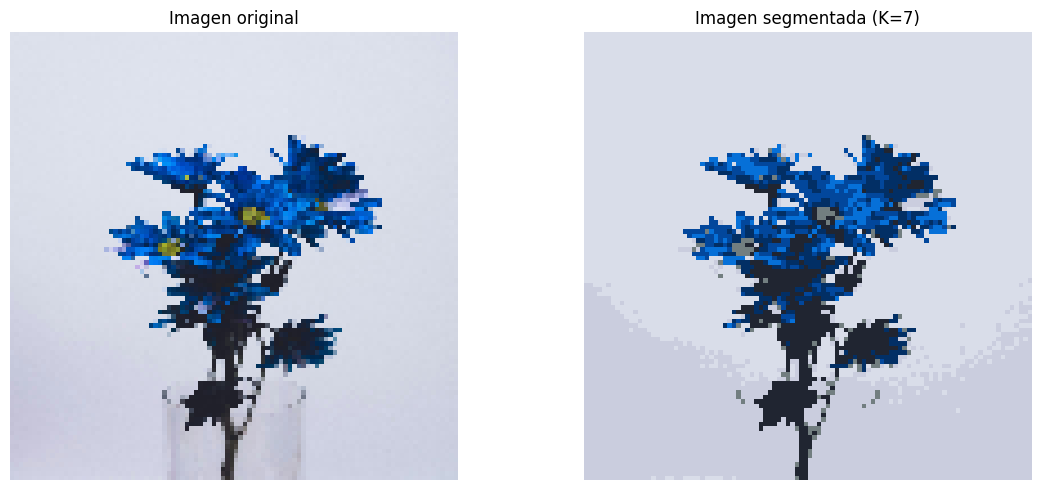

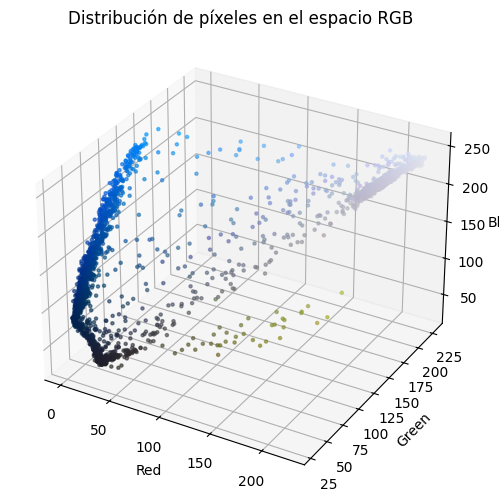

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Cargar imagen
img = cv2.imread('/content/FloresAzules.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionar para reducir carga computacional
img_small = cv2.resize(img_rgb, (100, 100))

# Convertir a una matriz de pixeles (n_pixeles x 3)
pixel_vals = img_small.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

# Clustering KMeans
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixel_vals)
labels = kmeans.labels_
centers = np.uint8(kmeans.cluster_centers_)

# Crear imagen segmentada
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img_small.shape)

# Visualización de espacio RGB en 3D
fig = plt.figure(figsize=(12, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(img_small)
plt.title('Imagen original')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title(f'Imagen segmentada (K={k})')
plt.axis('off')

plt.tight_layout()
plt.show()

# Representación 3D de los píxeles en espacio RGB
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

r, g, b = pixel_vals[:, 0], pixel_vals[:, 1], pixel_vals[:, 2]
ax.scatter(r, g, b, c=pixel_vals / 255.0, marker='o', s=5, alpha=0.6)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Distribución de píxeles en el espacio RGB')
plt.show()
